# Creating and Training the ML Model
This is where the machine learning model is built using different classifiers. The models are compared against one another, then a final model is chosen.

In [41]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,  classification_report, accuracy_score
import numpy as np
from sklearn.tree import plot_tree
from random import randint
import matplotlib.pyplot as plt
import timeit

## Loading the data

In [42]:
TEST_SIZE = 0.1

dataDict = pickle.load(open('./inputs_and_labels.pickle', 'rb'))
data = np.array(dataDict['data'])
labels = np.array(dataDict['labels']) 
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=TEST_SIZE, shuffle=True, stratify=labels)

## Initializing the models

In [43]:
modelList = []
modelAccuracy = []
modelTrainingTime = []

### Random Forest

In [44]:
rfc = RandomForestClassifier()
timeToTrain = timeit.timeit("rfc.fit(X=x_train, y=y_train)", globals=globals(), number=1)
modelTrainingTime.append(timeToTrain)
modelList.append(rfc)


### Support Vector Machines (SVM)

In [45]:
svc = svm.SVC(decision_function_shape='ovr', probability=True)
timeToTrain = timeit.timeit("svc.fit(X=x_train, y=y_train)", globals=globals(), number=1)
modelTrainingTime.append(timeToTrain)
modelList.append(svc)

## Testing the Models

In [46]:
modelNames = ['rfc', 'svc']
modelData = {}

for i, modelName in enumerate(modelNames):
  modelData[modelName] = {}
  modelData[modelName]['trained_model'] = modelList[i]
  modelData[modelName]["data"] = modelList[i].predict(x_test)
  modelData[modelName]["training_time"] = modelTrainingTime[i]
  modelData[modelName]['classification_report'] = classification_report(y_true=y_test, y_pred=modelData[modelName]["data"])
  modelData[modelName]['confusion_matrix'] = confusion_matrix(y_true=y_test,y_pred=modelList[i].predict(x_test), labels=modelList[i].classes_)

## Compare results of models

### Classification Score and Confusion Matrix


Results for model RFC

Accuracy score: 72%
Time-to-Train: 2.80 seconds
                  precision    recall  f1-score   support

       Chihuahua       0.64      0.60      0.62        15
      Rottweiler       0.88      0.88      0.88        16
golden_retriever       0.62      0.67      0.65        15

        accuracy                           0.72        46
       macro avg       0.71      0.71      0.71        46
    weighted avg       0.72      0.72      0.72        46



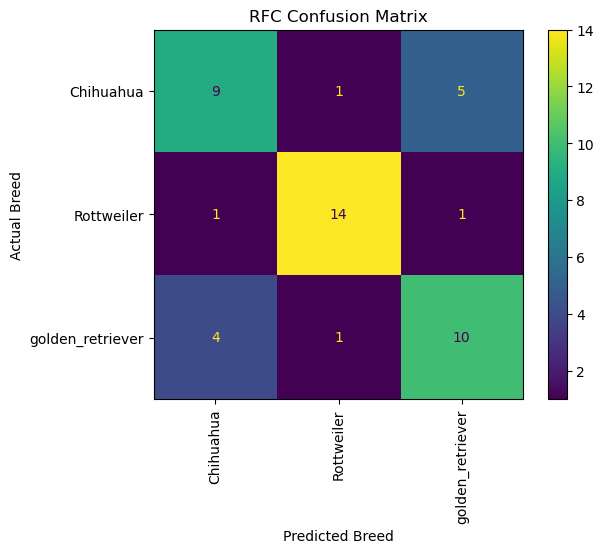


Results for model SVC

Accuracy score: 65%
Time-to-Train: 5.62 seconds
                  precision    recall  f1-score   support

       Chihuahua       0.67      0.53      0.59        15
      Rottweiler       0.78      0.88      0.82        16
golden_retriever       0.50      0.53      0.52        15

        accuracy                           0.65        46
       macro avg       0.65      0.65      0.64        46
    weighted avg       0.65      0.65      0.65        46



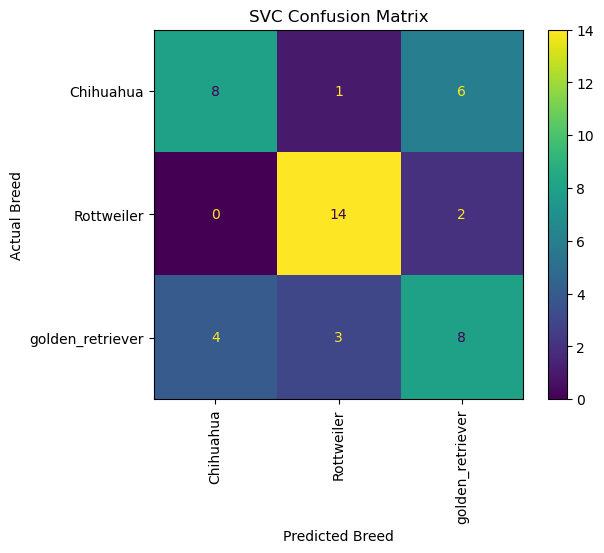

In [68]:
displayLabels = np.unique(y_test)
for name, dataCollection in modelData.items():
  print(f'\nResults for model {str(name).upper()}')
  print("="*40, "\n")
  print(f'Accuracy score: {(accuracy_score(y_true=y_test, y_pred=dataCollection['data']) *100):.0f}%')
  print(f'Time-to-Train: {dataCollection['training_time']:.2f} seconds')
  print(dataCollection["classification_report"])
  disp = ConfusionMatrixDisplay(dataCollection['confusion_matrix'], display_labels=dataCollection['trained_model'].classes_)
  disp.plot()
  disp.ax_.set_xticklabels(displayLabels, rotation=90)
  disp.ax_.set_xlabel("Predicted Breed")
  disp.ax_.set_ylabel("Actual Breed")
  plt.title(f'{str(name).upper()} Confusion Matrix')
  plt.savefig(f'confusion_matrix_results_{name}.png', bbox_inches='tight')
  plt.show()

### Class Distribution

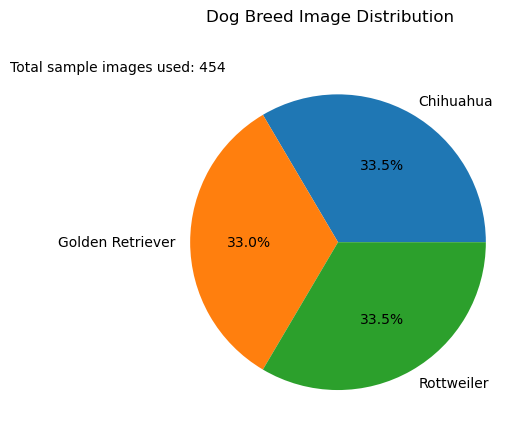

In [69]:
n_points = len(labels)
dataDistribution = {}
for category in labels:
  if category not in dataDistribution:
    dataDistribution[category] = 0
  dataDistribution[category] += 1

names = list(dataDistribution.keys())
for i in range(len(names)):
  t = names[i].split("_")
  newName = ''
  for part in t:
    newName += part.capitalize() + " "
  names[i] = newName.strip(" ")
    
values = list(dataDistribution.values())
fig, ax = plt.subplots()
ax.pie(values, labels=names, autopct='%1.1f%%')
fig.suptitle("Dog Breed Image Distribution")
fig.text(0, .85, f'Total sample images used: {len(labels)}')
plt.savefig(f'dog_breed_distribution.png')
plt.show()

### Decision Tree Sample from RFC

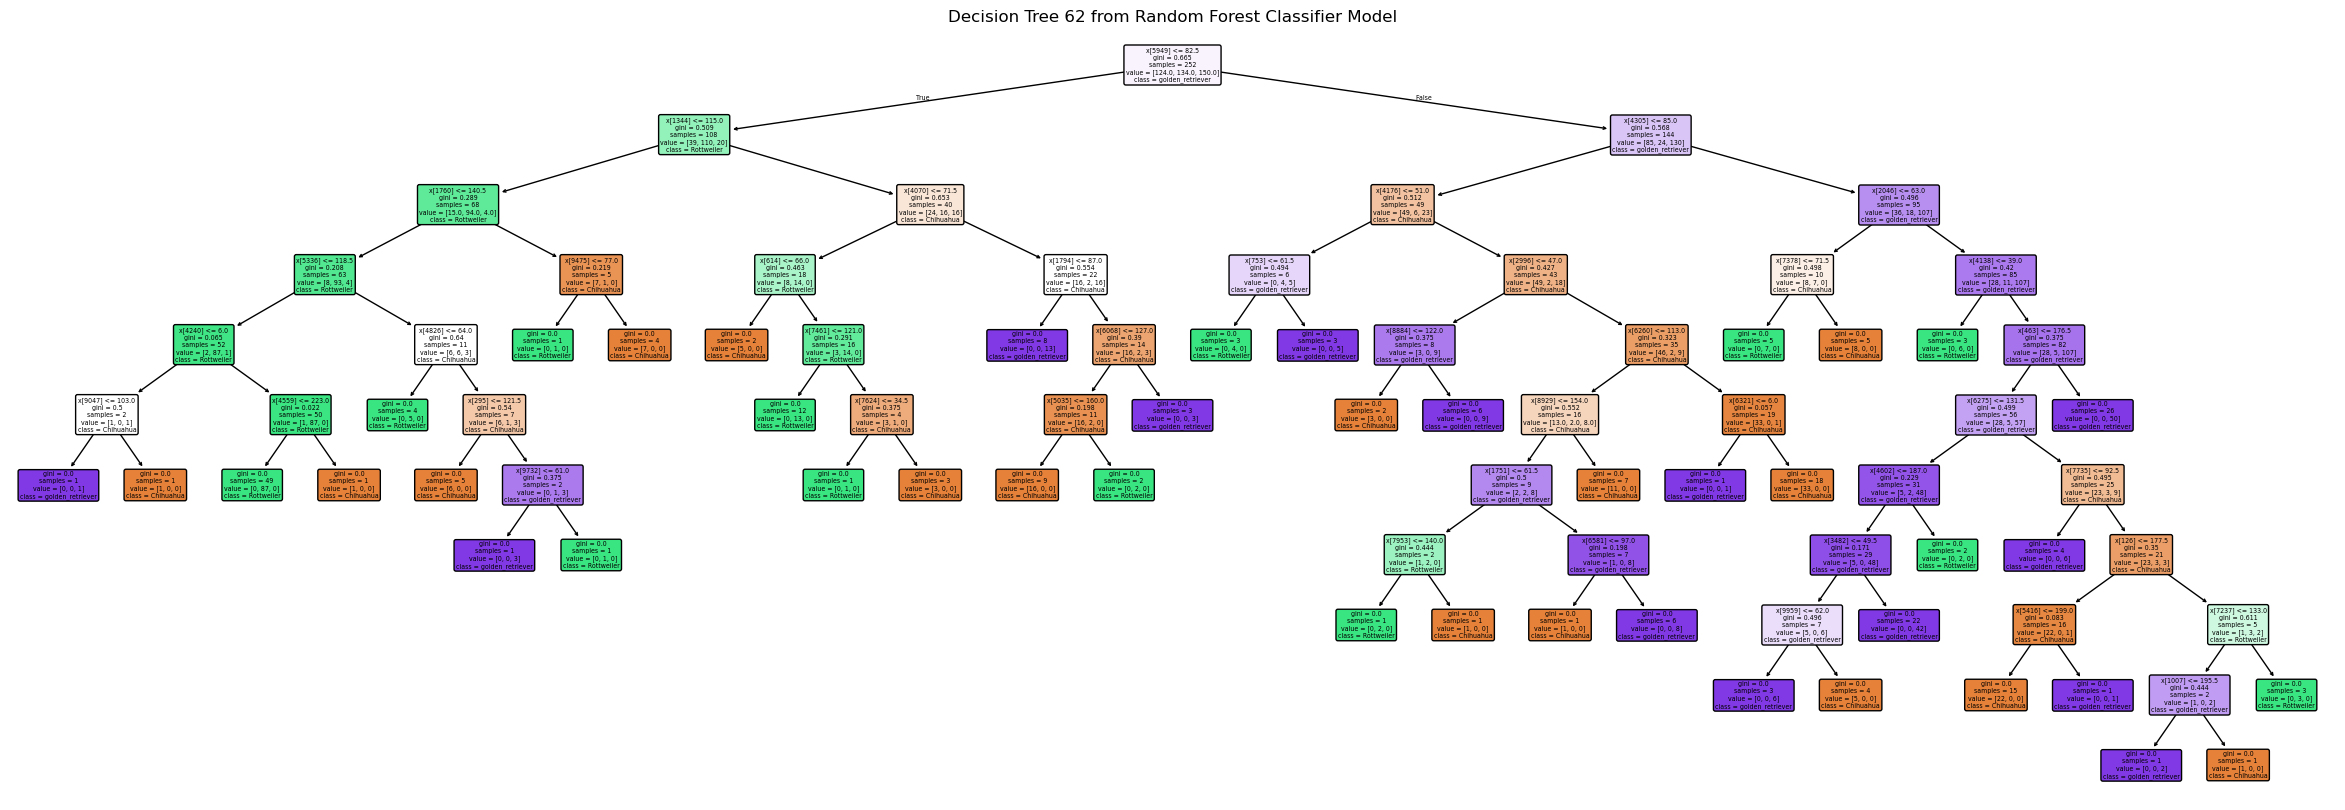

In [70]:
randomTree = randint(0, len(rfc.estimators_))
tree = rfc.estimators_[randomTree]
plt.figure(figsize=(30, 10))
plot_tree(tree,
          class_names=rfc.classes_,
          filled=True,
          rounded=True)
plt.title(f'Decision Tree {randomTree} from Random Forest Classifier Model')
plt.savefig(f'rfc_random_decision_tree.png')
plt.show()

## Save the models to file

In [71]:
import pickle
with open("./trained_models.p", 'wb') as f:
    pickle.dump({
    'rfc': rfc,
    'svc': svc
  }, f)